# ETAPA 1: Importando as principais bibliotecas

In [1]:
import numpy as np
import pandas as pd 
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.figure_factory as ff
import seaborn as sns
import re
import matplotlib.pyplot as plt

In [2]:
from statistics import mode

# ETAPA 2: Leitura da base de dados

### Vamos aqui abrir os arquivos licitacao.csv para cada ano da análise proposta (de 2016 até 2019), em seguida juntaremos todos eles em um único dataframe chamado licitacao

In [3]:
file_list = ['licitacao2016.csv','licitacao2017.csv','licitacao2018.csv','licitacao2019.csv']
  
licitacao = pd.DataFrame(pd.read_csv(file_list[0]))
  
for i in range(len(file_list)):
    data = pd.read_csv(file_list[i])
    df = pd.DataFrame(data)
    licitacao = pd.concat([licitacao,df],axis=0)

/home/joaoclaudio/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (52,54) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
/home/joaoclaudio/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (52,53,54,55) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
/home/joaoclaudio/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (53,54) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


### Vamos aqui abrir os arquivos item.csv para cada ano da análise proposta (de 2016 até 2019), em seguida juntaremos todos eles em um único dataframe chamado item.

In [4]:
file_list2 = ['item2016.csv','item2017.csv','item2018.csv', 'item2019.csv']
  
item = pd.DataFrame(pd.read_csv(file_list2[0]))
  
for i in range(len(file_list2)):
    data = pd.read_csv(file_list2[i])
    df = pd.DataFrame(data)
    item = pd.concat([item,df],axis=0)

/home/joaoclaudio/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (19,27,28) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
/home/joaoclaudio/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (26,27,28) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
/home/joaoclaudio/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (8,19,25,26,27,28) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
/home/joaoclaudio/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (8,25,26,27) have mixed types.Specify dtype option on import or set low_me

In [5]:
licitacao.shape

(267477, 61)

In [6]:
item.shape

(3657124, 32)

### Tivemos aqui 267.477 licitações e 3.657.124 ítens comprados.

# ETAPA 3: ANÁLISE DO DATAFRAME LICITACAO

Vamos dar uma olhada nas colunas no dataframe licitacao

In [7]:
licitacao.columns

Index(['CD_ORGAO', 'NM_ORGAO', 'NR_LICITACAO', 'ANO_LICITACAO',
       'CD_TIPO_MODALIDADE', 'NR_COMISSAO', 'ANO_COMISSAO', 'TP_COMISSAO',
       'NR_PROCESSO', 'ANO_PROCESSO', 'TP_OBJETO', 'CD_TIPO_FASE_ATUAL',
       'TP_LICITACAO', 'TP_NIVEL_JULGAMENTO', 'DT_AUTORIZACAO_ADESAO',
       'TP_CARACTERISTICA_OBJETO', 'TP_NATUREZA', 'TP_REGIME_EXECUCAO',
       'BL_PERMITE_SUBCONTRATACAO', 'TP_BENEFICIO_MICRO_EPP',
       'TP_FORNECIMENTO', 'TP_ATUACAO_REGISTRO', 'NR_LICITACAO_ORIGINAL',
       'ANO_LICITACAO_ORIGINAL', 'NR_ATA_REGISTRO_PRECO',
       'DT_ATA_REGISTRO_PRECO', 'PC_TAXA_RISCO', 'TP_EXECUCAO', 'TP_DISPUTA',
       'TP_PREQUALIFICACAO', 'BL_INVERSAO_FASES', 'TP_RESULTADO_GLOBAL',
       'CNPJ_ORGAO_GERENCIADOR', 'NM_ORGAO_GERENCIADOR', 'DS_OBJETO',
       'CD_TIPO_FUNDAMENTACAO', 'NR_ARTIGO', 'DS_INCISO', 'DS_LEI',
       'DT_INICIO_INSCR_CRED', 'DT_FIM_INSCR_CRED', 'DT_INICIO_VIGEN_CRED',
       'DT_FIM_VIGEN_CRED', 'VL_LICITACAO', 'BL_ORCAMENTO_SIGILOSO',
       'BL_RECEBE

Vamos selecionar aqui apenas as colunas que são mais importantes para nossa análise, tanto para o dataset licitação, quanto pro dataset itens

código do órgão(CD_ORGAO), nome do órgão(NM_ORGAO), número da licitação(NR_LICITACAO), ano da licitação(ANO_LICITACAO), descrição do objeto da licitação(DS_OBJETO), data de abertura da licitação(DT_ABERTURA), número da licitação(NR_LICITACAO), descrição do ítem licitado(DS_ITEM)


In [8]:
item = item[['CD_ORGAO','NR_LICITACAO', 'ANO_LICITACAO', 'DS_ITEM', 'VL_UNITARIO_HOMOLOGADO']]
licitacao = licitacao[['CD_ORGAO', 'NM_ORGAO', 'NR_LICITACAO', 'ANO_LICITACAO', 'DS_OBJETO', 'TP_OBJETO', 'DT_ABERTURA']]

### Iremos agora filtrar as licitações apenas para o tipo COMPRA

In [9]:
licitacao=licitacao.query('TP_OBJETO=="COM"')

In [10]:
licitacao.shape

(94954, 7)

### Do universo de 267.477 licitações, apenas 94954 licitações do tipo compra.


A função Python Pandas DataFrame. reset_index() redefine o índice do quadro de dados fornecido. Ele substitui o índice antigo pelo índice padrão. 

In [11]:
licitacao.reset_index(drop=True, inplace=True)

Vamos fazer uma análise da coluna DS_OBJETO existente no dataframe licitacao, a ideia é saber quais objetos de licitações são os mais demanandados pelo conjunto dos órgrão do estado do Rio Grande do Sul

Observa-se que cada linha do dataframe licitacao corresponde a uma licitação específica, porém podemos agrupá-las por NR_LICITACAO, vale ressaltar aqui que um órgão pode aderir a qualquer objeto de licitação, vamos então calcular a quantidade total. Vamos fazer isso procurando quantas vezes cada um se repete na coluna NR_LICITACAO.

In [12]:
#iremos usar aqui df1 como uma dataframe para analisar o resultado
df1 = licitacao.drop_duplicates('NR_LICITACAO', keep=False)
df1.shape

(1029, 7)

Ou seja, temos 1029 objetos de licitação possíveis nesse nosso banco de dados( de um universo de 94954), considerando  o intervalo de anos entre 2016 e 2019. Podemos listar os nossos objetos de licitação e mostrar a contagem deles em ordem descrescente. Vamos primeiro contar quantos registros temos para cada objeto de licitação,  para isso precisamos agrupar nossos dados.


In [13]:
#vamos armazenar esse resultado no dataframde resultadolic
pd.set_option("max_rows", None)
resultadolic=licitacao.DS_OBJETO.value_counts().reset_index().rename(columns={'index': 'Descrição do objeto da licitação', 'DS_OBJETO': 'Total'})

### Até a linha 40 temos objetos de licitação com mais de 30 solitações realizadas

In [14]:
resultadolic.head(40)

,Descrição do objeto da licitação,Total
0,...,488
1,Material,258
2,AQUISIÇÃO DE MEDICAMENTOS,152
3,Aquisição de medicamentos,108
4,AQUISIÇÃO DE TUBOS DE CONCRETO,91
5,AQUISIÇÃO DE BENS DA(S) FAMÍLIA(S):0035-EQUIPA...,86
6,Aquisição de medicamentos.,79
7,AQUISIÇÃO DE MERENDA ESCOLAR,79
8,Aquisição de Medicamentos,66
9,Aquisição de material hospitalar,60


## Resultado  
Por meio do resultado anterior, podemos inferir que as licitações mais demandadas por órgãos do Rio Grande do Sul são: materiais, contratação de serviços, alimentação, medicamento e combustível.

# ETAPA 4: Análise do dataframe ITEM

Vale ressaltar que essa análise de ítens, se levarmos em conta os 4 anos (2016 à 2019), consumirá bastante memória.Para termos uma ideia dos ítens mais demandados, vamos fazer essa análise separadamente por ano, inciando com o ano de 2016.

## Análise para o ano de 2016

In [15]:
item2016=pd.DataFrame(pd.read_csv('item2016.csv'))

/home/joaoclaudio/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (19,27,28) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [16]:
resultadoitem2016=item2016.DS_ITEM.value_counts().reset_index().rename(columns={'index': 'Descrição do ítem', 'DS_ITEM': 'Total'})
resultadoitem2016.head(100)

,Descrição do ítem,Total
0,"MANGUEIRA SILICONE 2.1/2""",1360
1,MATERIAL,873
2,LIVRO,355
3,.,344
4,NÃO CADASTRADO,304
5,SERVIÇO,277
6,"Lote - área de 1,50x3,00m. Totalizando 4,50m²....",175
7,CENOURA,159
8,BETERRABA,151
9,TOMATE,131


Até a linha 20 temos ítens com mais de 100 compras realizadas, vamos exibir quais são:

In [17]:
resultadoitem2016.head(20)

,Descrição do ítem,Total
0,"MANGUEIRA SILICONE 2.1/2""",1360
1,MATERIAL,873
2,LIVRO,355
3,.,344
4,NÃO CADASTRADO,304
5,SERVIÇO,277
6,"Lote - área de 1,50x3,00m. Totalizando 4,50m²....",175
7,CENOURA,159
8,BETERRABA,151
9,TOMATE,131


In [25]:
#vamos armazenar no dataframe resultadoitem2016 apenas os 20 primeiros ítens
resultadoitem2016=resultadoitem2016.head(20)

<AxesSubplot:xlabel='Descrição do ítem'>

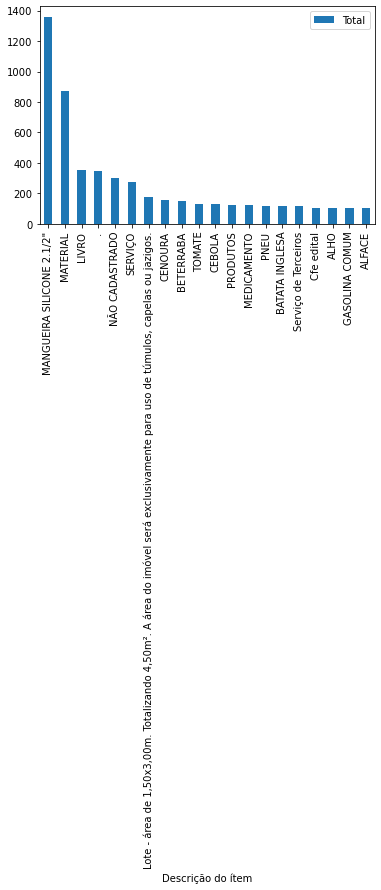

In [26]:
#vamos plotar um gráfico de barras para melhor visualização
resultadoitem2016.plot(x="Descrição do ítem", y=["Total"], kind="bar") 

## Resultado

Aqui podemos inferir que os principais bens materiais comprados pelos órgãos públicos do Rio Grande do Sul no ano de 2016 são: livros, mangueira de silicone, lotes, cenoura, beterraba, tomate,  medicamentos, pneus, batata inglesa,  alho, alface e gasolina comum.   
    

## Análises para o ano de 2017, 2018 e 2019.

Fizemos a mesma análise apresentada acima para os anos de 2017, 2018 e 2019:

In [27]:
resultadoitem2017=data.DS_ITEM.value_counts().reset_index().rename(columns={'index': 'Descrição do ítem', 'DS_ITEM': 'Total'})
resultadoitem2017=resultadoitem2017.head(20)

<AxesSubplot:xlabel='Descrição do ítem'>

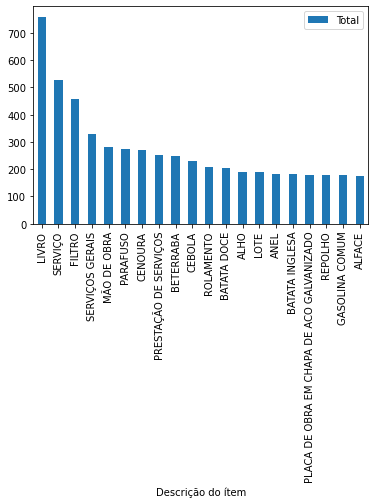

In [28]:
resultadoitem2017.plot(x="Descrição do ítem", y=["Total"], kind="bar") 


## Resultado
Aqui podemos inferir que os principais bens materiais comprados pelos órgãos públicos do Rio Grande do Sul no ano de 2017 são: mangueira de silicone, material, serviço, cenoura, beterraba, tomate,  medicamentos, pneus, batata inglesa,  alho, alface e gasolina comum.   
    

Para os anos de 2018 e 2019, praticamente os mesmos resultados são observados.

# ETAPA 5: MERGE DAS BASES ITEM E LICITACAO

### Agora iremos fazer um merge entre as bases item e licitacao, levando-se em conta o fato delas terem 
### as colunas CD_ORGAO, NR_LICITACAO e ANO_LICITACAO em comum

In [15]:
licitacao_item = pd.merge(item, licitacao, on = ["CD_ORGAO", "NR_LICITACAO", "ANO_LICITACAO"])

### podemos ver agora como ficou nosso dataframe licitacao_item

In [16]:
licitacao_item.head()

,CD_ORGAO,NR_LICITACAO,ANO_LICITACAO,DS_ITEM,VL_UNITARIO_HOMOLOGADO,NM_ORGAO,DS_OBJETO,TP_OBJETO,DT_ABERTURA
0,77200,15.0,2016,"Pneu 1000/20 liso radial, dianteiro, 16 lonas,...",1430.0,PM DE MATO LEITÃO,registro de preços de pneus,COM,2016-05-12
1,77200,15.0,2016,"Pneu 1000/20 liso radial, dianteiro, 16 lonas,...",1430.0,PM DE MATO LEITÃO,registro de preços de pneus,COM,2016-05-12
2,77200,15.0,2016,"Pneu 12.4x24 garra baixa, 10 lonas",1258.0,PM DE MATO LEITÃO,registro de preços de pneus,COM,2016-05-12
3,77200,15.0,2016,"Pneu 12.4x24 garra baixa, 10 lonas",1258.0,PM DE MATO LEITÃO,registro de preços de pneus,COM,2016-05-12
4,77200,15.0,2016,Pneu 1400x24 mínimo 12 lonas,1998.0,PM DE MATO LEITÃO,registro de preços de pneus,COM,2016-05-12


podemos verificar o tamanho dele

In [17]:
licitacao_item.shape

(4468407, 9)


Vamos pegar aqui os nomes de todos os órgão sem repetição, nosso intuito será fazer um agrupamento por tipos de órgãos 

In [18]:
orgaos=np.unique(licitacao_item["NM_ORGAO"])
orgaos

array(['ADM. DE  CONSÓRCIOS  INTERMUNIC. S/A. - CAXIAS DO SUL',
       'AGÊNCIA EST. DE REGULAÇÃO DOS SERV. PÚBL. DELEG. DO RGS',
       'AGÊNCIA MUN. REGULAÇÃO  DOS SERV. PÚBL. DELEG. DE S. GABRIEL',
       'AGÊNCIA REGULADORA DE SERVIÇOS PÚBLICOS DELEGADOS DE SANTA CRUZ DO SUL',
       'AGÊNCIA REGULADORA DOS SERV. PÚBL. MUNIC. DE ERECHIM',
       'ASSEMBLEIA LEGISLATIVA',
       'ASSOCIAÇÃO SULINA DE CRÉDITO E ASSISTÊNCIA RURAL',
       'BADESUL DESENVOLVIMENTO S.A. - AGÊNCIA DE FOMENTO/RS',
       'BANCO DO ESTADO DO RIO GRANDE DO SUL S.A.',
       'BANCO REGIONAL DE DESENVOLVIMENTO DO EXTREMO SUL',
       'BANRISUL CARTÕES S.A.',
       'BANRISUL S.A. - ADMINISTRADORA DE CONSÓRCIOS',
       'BANRISUL S.A. CORRETORA DE VALORES MOBILIÁRIOS E CÂMBIO',
       'BRIGADA MILITAR',
       'CAIXA PREST. ASSIST. SERV. SAÚDE DOS SERV. MUN. DE P. FUNDO',
       'CENTRAIS DE ABASTECIMENTO DO RIO GRANDE DO SUL S.A.',
       'CENTRAIS ELÉTRICAS DE CARAZINHO S/A.',
       'CENTRAL DE LICITAÇÕES D

In [19]:
orgaos.shape

(843,)

### Temos aproximadamente 843 órgãos, vamos fazer aqui uma categorização. Faremos isso "usando" o regex

In [20]:
licitacao_item["NM_ORGAO"] = licitacao_item["NM_ORGAO"].str.replace(r'(^.*PM.*$)', 'PM', regex=True)
licitacao_item["NM_ORGAO"] = licitacao_item["NM_ORGAO"].str.replace(r'(^.*CM.*$)', 'CM', regex=True)
licitacao_item["NM_ORGAO"] = licitacao_item["NM_ORGAO"].str.replace(r'(^.*TURÍST.*$|^.*TURISM.*$)', 'TURISMO', regex=True)
licitacao_item["NM_ORGAO"] = licitacao_item["NM_ORGAO"].str.replace(r'(^.*BANCO.*$)', 'BANCO', regex=True)
licitacao_item["NM_ORGAO"] = licitacao_item["NM_ORGAO"].str.replace(r'(^.*REGULA.*$)', 'AG. REGULADORA', regex=True)
licitacao_item["NM_ORGAO"] = licitacao_item["NM_ORGAO"].str.replace(r'(^.*ÁGUA.*$|^.*ESGOT.*$|^.*SANEAM.*$|^.*RESÍDUOS.*$|^.*SAN. BÁSICO.*$|^.*LIMPEZA URB.*$)', 'SANEAMENTO', regex=True)
licitacao_item["NM_ORGAO"] = licitacao_item["NM_ORGAO"].str.replace(r'(^.*BACIA HIDROG.*$)', 'REC. HÍDRICOS', regex=True)
licitacao_item["NM_ORGAO"] = licitacao_item["NM_ORGAO"].str.replace(r'(^.*ENERGIA.*$|^.*ELÉTR.*$|^.*GÁS.*$)', 'ENERGIA ELÉTRICA', regex=True)
licitacao_item["NM_ORGAO"] = licitacao_item["NM_ORGAO"].str.replace(r'(^.*PREV.*$)', 'PREVIDÊNCIA', regex=True)
licitacao_item["NM_ORGAO"] = licitacao_item["NM_ORGAO"].str.replace(r'(^.*CONS. INTERM.*$)', 'CONSÓRCIO INTERMUNICIPAL', regex=True) 
licitacao_item["NM_ORGAO"] = licitacao_item["NM_ORGAO"].str.replace(r'(^.*CULT.*$|^.*ART.*$)', 'FUNDAÇÃO CULTURAL', regex=True)
licitacao_item["NM_ORGAO"] = licitacao_item["NM_ORGAO"].str.replace(r'(^.*TRANSP.*$|^.*RODOV.*$)', 'TRANSPORTE', regex=True)
licitacao_item["NM_ORGAO"] = licitacao_item["NM_ORGAO"].str.replace(r'(^.*SAÚDE.*$|^.*HOSP.*$|^.*FARMÁC.*$)', 'SAÚDE', regex=True)
licitacao_item["NM_ORGAO"] = licitacao_item["NM_ORGAO"].str.replace(r'(^.*ASSIST. SOC.*$|^.*LAR DE ACOLHIM.*$|^.*ASSIST.*$|^.*SEGURIDADE SOCIAL.*$)', 'ASSIST. SOCIAL', regex=True)

## Observação
aqui basicamente, onde encontramos PM na descrição do órgão, categorizamos aquele órgão como PM, onde encontramos por exemplo TRANSP ou RODOV na descrição, categorizamos aquele órgão como TRANSPORTE. Vale ressaltar que essa  seleção foi bastante trabalhosa, pois foi necessário checar vários órgão no gooogle, no intuito de entender qual  seria sua categoria..

In [21]:
licitacao_item["NM_ORGAO"]

0    PM
1    PM
2    PM
3    PM
4    PM
Name: NM_ORGAO, dtype: object

In [22]:
orgaos2=np.unique(licitacao_item["NM_ORGAO"])


In [23]:
orgaos2.shape

(63,)

### Obtivemos aproxidamente 63 categorias de órgãos agora

### Vamos fazer um agrupamento de nosso dataframe licitacao_item Por ano e por órgão

In [19]:
pd.options.display.float_format = '{:.2f}'.format
from scipy import stats

licitacao_item_grupos_ano = licitacao_item.groupby(["NM_ORGAO","ANO_LICITACAO"]).agg(quantidade_de_itens_comprados = ("DS_ITEM", lambda x: x.nunique()),
                                                                 item_mais_caro = ("VL_UNITARIO_HOMOLOGADO", "max"),
                                                                 gasto_total = ("VL_UNITARIO_HOMOLOGADO", "sum") )#.reset_index()

In [20]:
#Adiciona NAN aos anos em que não houve compras 
index = pd.MultiIndex.from_product(licitacao_item_grupos_ano.index.levels)
licitacao_item_grupos_ano.reindex(index)

quantidade_de_itens_comprados  \
NM_ORGAO                                           ANO_LICITACAO                                  
ADM. DE  CONSÓRCIOS  INTERMUNIC. S/A. - CAXIAS ... 2016                                     NaN   
                                                   2017                                     NaN   
                                                   2018                                     NaN   
                                                   2019                                    2.00   
AG. REGULADORA                                     2016                                    4.00   
                                                   2017                                    4.00   
                                                   2018                                   28.00   
                                                   2019                                   22.00   
ASSEMBLEIA LEGISLATIVA                             2016                                     NaN   
                                                   2017                                     NaN   
                                                   2018                                  306.00   
                                                   2019                                  203.00   
ASSIST. SOCIAL                                     2016                                  418.00   
                                                   2017                                  215.00   
                                                   2018                                  618.00   
                                                   2019                                  598.00   
BADESUL DESENVOLVIMENTO S.A. - AGÊNCIA DE FOMEN... 2016                                     NaN   
                                                   2017                                   20.00   
                                                   2018                                   30.00   
                                                   2019                                   17.00   
BANCO                                              2016                                     NaN   
                                                   2017                                  112.00   
                                                   2018                                  405.00   
                                                   2019                                  354.00   
BANRISUL S.A. - ADMINISTRADORA DE CONSÓRCIOS       2016                                     NaN   
                                                   2017                                     NaN   
                                                   2018                                    1.00   
                                                   2019                                    3.00   
BANRISUL S.A. CORRETORA DE VALORES MOBILIÁRIOS ... 2016                                     NaN   
                                                   2017                                    5.00   
                                                   2018                                     NaN   
                                                   2019                                    1.00   
BRIGADA MILITAR                                    2016                                     NaN   
                                                   2017                                    3.00   
                                                   2018                                  440.00   
                                                   2019                                   70.00   
CENTRAIS DE ABASTECIMENTO DO RIO GRANDE DO SUL ... 2016                                     NaN   
                                                   2017                                  552.00   
                                                   2018                                  752.00   
       

In [21]:
#Os índices dos grupos (ano e orgao) se tornam colunas do dataframe
licitacao_item_grupos_ano = licitacao_item_grupos_ano.reset_index()

In [22]:
pd.set_option("max_rows", None)
licitacao_item_grupos_ano

,NM_ORGAO,ANO_LICITACAO,quantidade_de_itens_comprados,item_mais_caro,gasto_total
0,ADM. DE CONSÓRCIOS INTERMUNIC. S/A. - CAXIAS...,2019,2,103000.00,103000.00
1,AG. REGULADORA,2016,4,NaN,0.00
2,AG. REGULADORA,2017,4,6779.66,6779.66
3,AG. REGULADORA,2018,28,8800.00,21371.61
4,AG. REGULADORA,2019,22,96998.04,102058.79
5,ASSEMBLEIA LEGISLATIVA,2018,306,6100000.00,14763382.46
6,ASSEMBLEIA LEGISLATIVA,2019,203,848745.28,5334894.38
7,ASSIST. SOCIAL,2016,418,18130.00,439154.58
8,ASSIST. SOCIAL,2017,215,611897.00,1856155.55
9,ASSIST. SOCIAL,2018,618,1179943.01,4370334.06


# ETAPA 6: ANÁLISE DE GRÁFICOS

### Plots: evolução dos gastos ao longo desses anos

Nós já observamos aqui que as principais licitações do estado do RS nesse período correspondem a:
contratação de serviços, alimentação, medicamento e combustível.
Então vamos plotar gráficos da evolução dos gastos ao longo desses anos para os seguintes tipos de órgãos: 
Saúde, ASSIST. SOCIAL, TRANSPORTE e SANEAMENTO. 
Vale ressaltar que podemos fazer isso para todas as 63 categorais, mas ficaria tedioso. A ideia aqui é mostrar
as possibilidades de nossa análise.

In [33]:
licitacao_item_grupos_ano_filtro = licitacao_item_grupos_ano[licitacao_item_grupos_ano["NM_ORGAO"].isin(["SAÚDE"])]

Text(0.5, 1.0, 'Gasto total com SAÙDE ao longo dos anos')

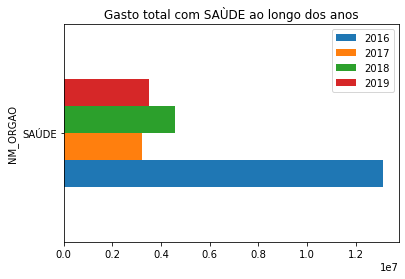

In [34]:
licitacao_item_grupos_ano_filtro.groupby(["NM_ORGAO", "ANO_LICITACAO"])["gasto_total"].sum().unstack().plot(kind="barh")
plt.legend(loc="upper right")
plt.title("Gasto total com SAÙDE ao longo dos anos")

In [35]:
licitacao_item_grupos_ano_filtro = licitacao_item_grupos_ano[licitacao_item_grupos_ano["NM_ORGAO"].isin(["TRANSPORTE"])]

Text(0.5, 1.0, 'Gasto total com TRANSPORTE ao longo dos anos')

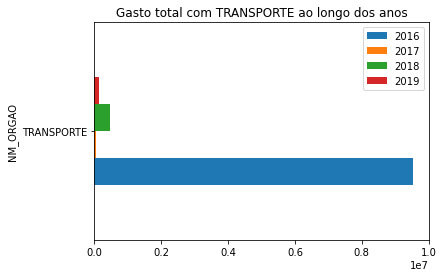

In [36]:
licitacao_item_grupos_ano_filtro.groupby(["NM_ORGAO", "ANO_LICITACAO"])["gasto_total"].sum().unstack().plot(kind="barh")
plt.legend(bbox_to_anchor=(1.0, 1.0))
plt.title("Gasto total com TRANSPORTE ao longo dos anos")

In [38]:
licitacao_item_grupos_ano_filtro = licitacao_item_grupos_ano[licitacao_item_grupos_ano["NM_ORGAO"].isin(["ASSIST. SOCIAL"])]

Text(0.5, 1.0, 'Gasto total com ASSIST. SOCIAL ao longo dos anos')

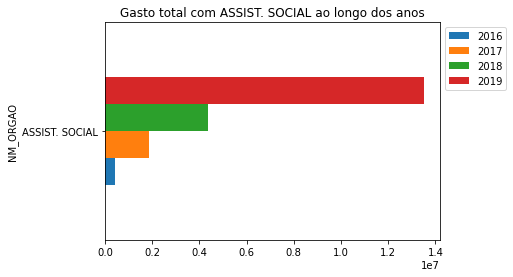

In [39]:
licitacao_item_grupos_ano_filtro.groupby(["NM_ORGAO", "ANO_LICITACAO"])["gasto_total"].sum().unstack().plot(kind="barh")
plt.legend(bbox_to_anchor=(1.0, 1.0))
plt.title("Gasto total com ASSIST. SOCIAL ao longo dos anos")

In [40]:
licitacao_item_grupos_ano_filtro = licitacao_item_grupos_ano[licitacao_item_grupos_ano["NM_ORGAO"].isin(["SANEAMENTO"])]

Text(0.5, 1.0, 'Gasto total com SANEAMENTO ao longo dos anos')

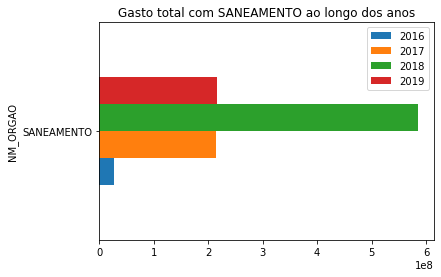

In [41]:
licitacao_item_grupos_ano_filtro.groupby(["NM_ORGAO", "ANO_LICITACAO"])["gasto_total"].sum().unstack().plot(kind="barh")
plt.legend(bbox_to_anchor=(1.0, 1.0))
plt.title("Gasto total com SANEAMENTO ao longo dos anos")

## Resultado
A partir dos gráficos acima podemos perceber o seguinte:
    1)os gastos com saneamento básico aumentaram de 2016 até 2018, porém em 2019 houve um grande recuo.
    2) os gastos com assistência social, aumentam durante o passar dos 4 anos aqui analisados.
    3) os gastos com transporte foram extremamente elevados em 2016, quando comparamos com os anos seguintes.
    4)os gastos com sáude foram bem maiores no ano de 2016, nos anos seguintes foram bem menores, porém praticamente constantes.

### Plots: quantidade total de ítens por órgão comprados durante todo o período

In [42]:
licitacao_item_grupos = licitacao_item.groupby(["NM_ORGAO"]).agg(quantidade_de_itens_comprados = ("DS_ITEM", lambda x: x.nunique()),
                                                                 item_mais_caro = ("VL_UNITARIO_HOMOLOGADO", "max"),
                                                                 gasto_total = ("VL_UNITARIO_HOMOLOGADO", "sum")).reset_index()

Vamos ordenar a quantidade de itens comprados por órgão em ordem decrescente

In [43]:
pd.set_option("max_rows", None)
licitacao_item_grupos
df_ordenado = licitacao_item_grupos.sort_values(by='quantidade_de_itens_comprados', ascending=False)
df_ordenado

,NM_ORGAO,quantidade_de_itens_comprados,item_mais_caro,gasto_total
47,PM,1203651,90833000.00,5635540690.22
52,SAÚDE,26720,1148500.00,24372224.43
29,CONSÓRCIO INTERMUNICIPAL,24340,4599524.44,18325845.75
51,SANEAMENTO,22890,71742116.84,1043213952.53
20,CM,16810,1028932.23,28669512.32
12,CIA. DE DESENV. DE CAXIAS DO SUL,9792,949990.10,16192495.96
10,CENTRAL DE LICITAÇÕES DO ESTADO,4904,464700000.00,794643943.51
11,CIA. CARRIS PORTO-ALEGRENSE,3413,4000000.00,93314765.40
23,CONS. PÚBL. DO EXTREMO SUL,3046,290000.00,746091.21
37,ENERGIA ELÉTRICA,2709,655862.46,9879520.99


In [ ]:
Da tabela acima percebe-se que os órgãos que mais compram ítens são: PM, Saúde,Consórcio intermunicipal e Saneamento.

### Vamos plotar gráficos aqui da quantidade de ítens comprados por tipo de órgão ao longo do período

In [64]:
licitacao_item_grupos_ano_filtro = licitacao_item_grupos_ano[licitacao_item_grupos_ano["NM_ORGAO"].isin(["SAÚDE"])]

Text(0.5, 1.0, 'Quantidade de ítes comprados pela SAUDE ao longo dos anos')

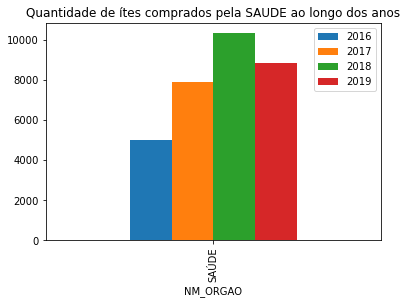

In [65]:
licitacao_item_grupos_ano_filtro.groupby(["NM_ORGAO", "ANO_LICITACAO"])["quantidade_de_itens_comprados"].sum().unstack().plot(kind="bar")
plt.legend(bbox_to_anchor=(1.0, 1.0))
plt.title("Quantidade de ítes comprados pela SAUDE ao longo dos anos")

In [66]:
licitacao_item_grupos_ano_filtro = licitacao_item_grupos_ano[licitacao_item_grupos_ano["NM_ORGAO"].isin(["TRANSPORTE"])]

Text(0.5, 1.0, 'Quantidade de ítes comprados pelo TRANSPORTE ao longo dos anos')

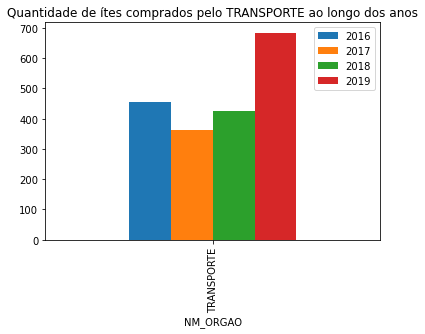

In [67]:
licitacao_item_grupos_ano_filtro.groupby(["NM_ORGAO", "ANO_LICITACAO"])["quantidade_de_itens_comprados"].sum().unstack().plot(kind="bar")
plt.legend(bbox_to_anchor=(1.0, 1.0))
plt.title("Quantidade de ítes comprados pelo TRANSPORTE ao longo dos anos")

In [68]:
licitacao_item_grupos_ano_filtro = licitacao_item_grupos_ano[licitacao_item_grupos_ano["NM_ORGAO"].isin(["ASSIST. SOCIAL"])]

Text(0.5, 1.0, 'Quantidade de ítes comprados pela ASSIST. SOCIAL ao longo dos anos')

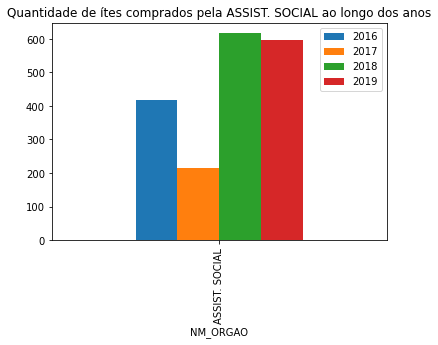

In [69]:
licitacao_item_grupos_ano_filtro.groupby(["NM_ORGAO", "ANO_LICITACAO"])["quantidade_de_itens_comprados"].sum().unstack().plot(kind="bar")
plt.legend(bbox_to_anchor=(1.0, 1.0))
plt.title("Quantidade de ítes comprados pela ASSIST. SOCIAL ao longo dos anos")

In [58]:
licitacao_item_grupos_ano_filtro = licitacao_item_grupos_ano[licitacao_item_grupos_ano["NM_ORGAO"].isin(["SANEAMENTO"])]

Text(0.5, 1.0, 'Quantidade de ítes comprados no SANEAMENTO ao longo dos anos')

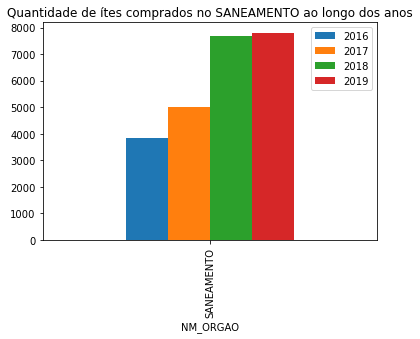

In [59]:
licitacao_item_grupos_ano_filtro.groupby(["NM_ORGAO", "ANO_LICITACAO"])["quantidade_de_itens_comprados"].sum().unstack().plot(kind="bar")
plt.legend(bbox_to_anchor=(1.0, 1.0))
plt.title("Quantidade de ítes comprados no SANEAMENTO ao longo dos anos")

In [62]:
licitacao_item_grupos_ano_filtro = licitacao_item_grupos_ano[licitacao_item_grupos_ano["NM_ORGAO"].isin(["PM"])]

Text(0.5, 1.0, 'Quantidade de ítes comprados pela PM ao longo dos anos')

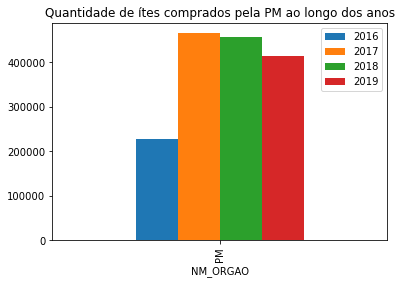

In [63]:
licitacao_item_grupos_ano_filtro.groupby(["NM_ORGAO", "ANO_LICITACAO"])["quantidade_de_itens_comprados"].sum().unstack().plot(kind="bar")
plt.legend(bbox_to_anchor=(1.0, 1.0))
plt.title("Quantidade de ítes comprados pela PM ao longo dos anos")

## Resultado
Dos gráficos acima podemos conluir
1) ao longo do tempo os órgão da categoria SANEAMENTO compram cada vez mais ítens

2) os órgãoS da categoria assistencia social, tiverem uma diminuição drástica na compra de ítens em 2017, porém 
essa quantidade de compras aumentou em 2018 e 2019.

3) A quantidade de ítens comprados pelos órgão da categoria PM,aumentaram de 2016 para 2017, porém foram diminuindo de forma muito suave nos anos seguintes

4) a quantidade de ítens comprados pela categoria SAÚDE aumentou no período de 2016 até 2018, mas em 2019
houve uma redução 

5) na categoria transporte o número de ítens comprados ficou mais ou menos contantes entre 2016 e 2018, mas em 2019 houve um aumento expressivo.

## Podemos querer saber que tipo de órgão, apresenta o maior gasto com compras, para isso bastar ordenar o dataframe licitacao_item_grupos em função da coluna gasto_total. Assim: 

In [59]:
df_ordenado2= licitaãcao_item_grupos.sort_values(by='gasto_total', ascending=False)
df_ordenado2.plot(kind="barh")

,NM_ORGAO,quantidade_de_itens_comprados,item_mais_caro,gasto_total
47,PM,1203651,90833000.00,5635540690.22
51,SANEAMENTO,22890,71742116.84,1043213952.53
10,CENTRAL DE LICITAÇÕES DO ESTADO,4904,464700000.00,794643943.51
11,CIA. CARRIS PORTO-ALEGRENSE,3413,4000000.00,93314765.40
50,PROCURADORIA-GERAL DE JUSTIÇA,1050,7914051.93,48244313.72
14,CIA. DE PROCESSAMENTO DE DADOS DO RS,928,5146000.00,39694927.14
20,CM,16810,1028932.23,28669512.32
52,SAÚDE,26720,1148500.00,24372224.43
3,ASSIST. SOCIAL,1543,1316951.72,20174625.73
2,ASSEMBLEIA LEGISLATIVA,508,6100000.00,20098276.84


## Resultado
Os tipos de órgãos com gastos mais altos são a PM e SANEAMENTO.

# ETAPA 7: construção de um wordcloud

Faremos uma análise exploratória inicial para entender mais sobre o nosso conjunto de Dados. O Objetivo é construir uma núvem de palavras, com o uso do Word Cloud que é uma técnica de visualização de dados usada para representar dados de texto em que o tamanho de cada palavra indica sua frequência ou importância.

iremos usar duas outras bibliotecas spacy e textBlob:

spaCy é uma biblioteca de software de código aberto para processamento avançado de linguagem natural.

TextBlob é uma biblioteca para processar dados textuais, fornecendo uma API simples para se aprofundar em comum linguagem natural (NLP) tarefas de processamento. 

In [63]:
pip install spacy


     |████████████████████████████████| 6.2 MB 3.7 MB/s eta 0:00:01
     |████████████████████████████████| 454 kB 28.6 MB/s eta 0:00:01
     |████████████████████████████████| 9.9 MB 19.2 MB/s eta 0:00:01
     |████████████████████████████████| 130 kB 9.8 MB/s eta 0:00:01
     |████████████████████████████████| 42 kB 1.7 MB/s  eta 0:00:01
     |████████████████████████████████| 13.7 MB 17.1 MB/s eta 0:00:01
     |████████████████████████████████| 181 kB 22.3 MB/s eta 0:00:01
     |████████████████████████████████| 663 kB 15.7 MB/s eta 0:00:01
     |████████████████████████████████| 58 kB 8.2 MB/s s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [65]:
pip install textblob

     |████████████████████████████████| 636 kB 5.2 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [70]:
import numpy as np
import spacy
import nltk
import seaborn as sns
import warnings
from textblob import TextBlob

In [71]:
warnings.filterwarnings("ignore")
%matplotlib inline

### Embora seja possível utilizar apenas uma biblioteca para esta atividade, utilizarei algumas para demonstrar suas particularidades e também explorar o que  cada API tem de melhor, pois o conhecimento em diversas APIs fortalece a entrega com mais qualidade, riqueza em detalhes e insights não antes identificados.

### Vamos analisar aqui a coluna DS_OBJECT do dataframe licitacao

In [72]:
analise=licitacao['DS_OBJETO']

In [73]:
analise.head(10)


0                        Aquisição de merenda escolar 
1    AQUISIÇÃO DE PROTOCOLADORA E FRAGMENTADORA DE ...
2    Aquisição de materiais de limpeza para as dive...
3                       Aquisição de tubos de concreto
4                       Aquisição de tubos de concreto
5     Aquisição de módulos de comunicação de dados ...
6                            Aquisição de medicamentos
7    Aquisição de materiais hidráulicos em PVC, PEA...
8    AQUISIÇÃO DE GÊNEROS ALIMENTÍCIOS - FRUTAS E V...
9    Aquisição de cargas de gás liquefeito de petró...
Name: DS_OBJETO, dtype: object

In [74]:
licitacao['DS_OBJETO'].shape

(94954,)

Quel tal gerarmos um WordCloud com todos os dados da coluna DS_OBJETO

In [75]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk
nltk.download('stopwords')
stopwordsNltk = nltk.corpus.stopwords.words('portuguese')



[nltk_data] Downloading package stopwords to
[nltk_data]     /home/joaoclaudio/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [85]:
pip install wordcloud


     |████████████████████████████████| 371 kB 6.5 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [90]:
from wordcloud import WordCloud
words =[]
for i in licitacao['DS_OBJETO']:
    for p in i.lower().split():
        if p not in stopwordsNltk:
            words.append(p)
words= str(words)
    


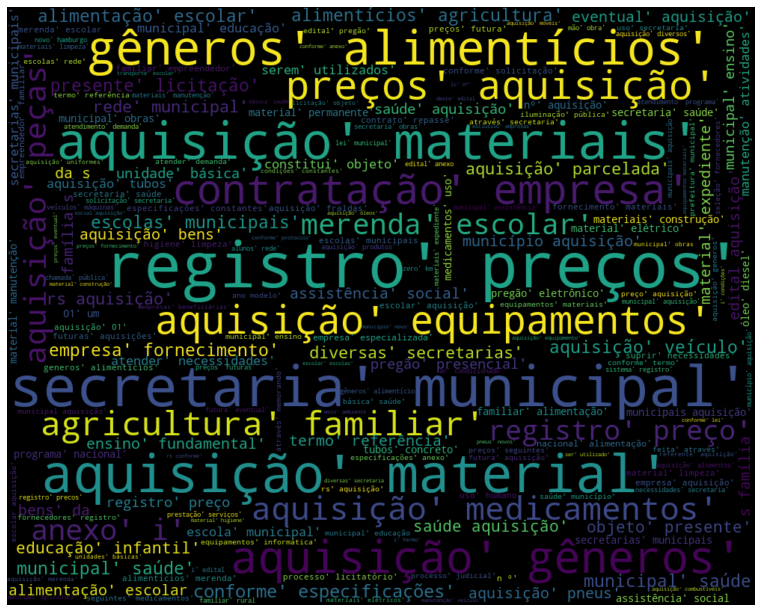

In [91]:
#criaremos agora a variável wordcloud

wordcloud = WordCloud(width=1000, height=800, margin=0).generate(words)
plt.figure(figsize=(20,11))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0,y=0)

## Resultado
Analisando a imagem acima, percebemos que os termos mais comuns na coluna DS_OBJETO, correspondem a contratação empresa, prestação serviços, aquisição material, aquisição de gêneros alimentícios, aquisição de medicamentos. agricultura familiar.

    
Ou seja, o resultado obtido com o uso do worcloud é praticamente igual ao resultado obtido anteriormente, que foi:
"Por meio do resultado anterior, podemos inferir que as licitações mais demandadas por órgãos do Rio Grande do Sul são: materiais, contratação de serviços, alimentação, medicamento e combustível."


observação: ao fazer o wordcloud para o campo DS_ITEM, do dataframe item, tivemos problemas para obtenção da imagem, pois a quantidade de dados é muito grande, eu então analisei separadamente para o ano de 2016 para ter uma ideia do wordcloud, porém a imagem não traz informação que possa ser útil.